# Exercise 2 
## Switch from blocking communication to non-blocking communication (or vice versa) and measure the application again

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

labels = ["block_1", "noblock_1", "block_4", "noblock_4", "block_8", "noblock_8", "block_16", "noblock_16"]

plotName = ["50","100","150"]

filepath = 'data.csv'

In [2]:
def getDataFor(labels):
    with open(filepath) as csv_file:
        data = []
        for label in labels:
            csv_reader = csv.reader(csv_file, delimiter=',')
            data.append([[int(row[1]),float(row[2])] for row in csv_reader if row[0] == label])
            csv_file.seek(0)
    return data

In [95]:
plt.rcParams["figure.figsize"] = (30,8)


def plot(title, ax, labels, data, size):
    sizes = [data[0][size][0]]

    x = np.arange(len(sizes))
    width = 0.10
    
    rects1 = ax.bar(x - (3*width+width/2), [data[0][size][1]], width, label=labels[0])
    rects2 = ax.bar(x - (2*width+width/2), [data[1][size][1]], width, label=labels[1])
    rects3 = ax.bar(x - (width+width/2), [data[2][size][1]], width, label=labels[2])
    rects4 = ax.bar(x - width/2, [data[3][size][1]], width, label=labels[3])
    rects5 = ax.bar(x + width/2, [data[4][size][1]], width, label=labels[4])
    rects6 = ax.bar(x + width + width/2, [data[5][size][1]], width, label=labels[5])
    rects7 = ax.bar(x + 2*width + width/2, [data[6][size][1]], width, label=labels[6])
    rects8 = ax.bar(x + 3*width + width/2, [data[7][size][1]], width, label=labels[7])


    ax.set_title(title)
    ax.set_ylabel('Execution time in s')
    ax.set_xticks(x)
    ax.set_xticklabels(sizes)
    ax.set_xlabel('Problem Size')
    ax.legend()

    def autolabel(rects):
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

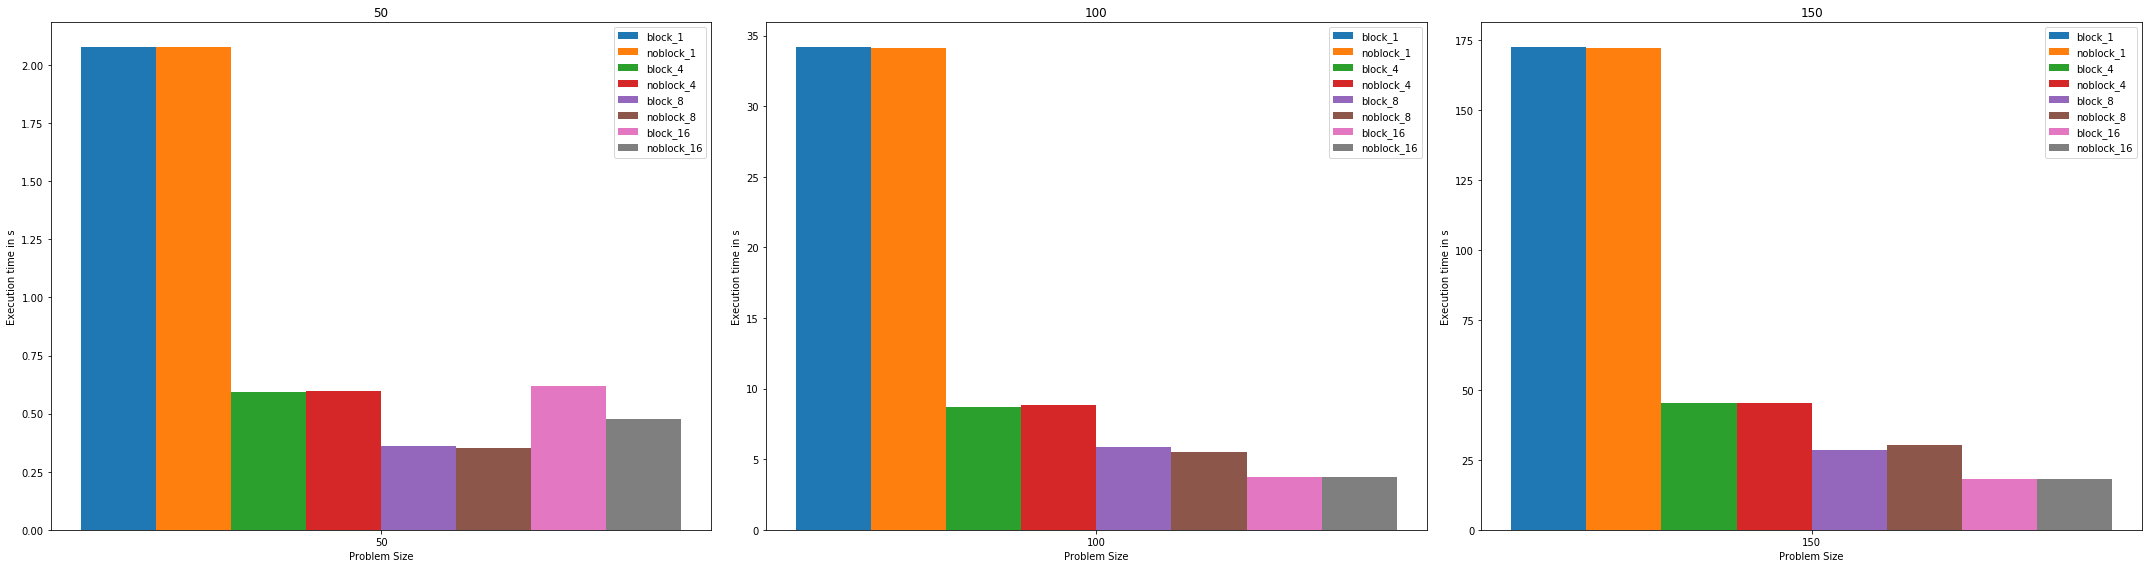

In [96]:
fig, ax = plt.subplots(1,3)

for i in range(0,3): plot(plotName[i], ax[i], labels, getDataFor(labels),i)

fig.tight_layout()
plt.show()

## Can you observe any difference?

The blocking and the non blocking communication have nearly the same performance. Sometimes the blocking one is faster, somtimes the non blocking one is faster. Nevertheless all differences are neglectable.